In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pandas as pd

In [6]:
height = np.random.normal(120,20,1000)
weight = (0.35* height)+np.random.normal(10,5,1000)

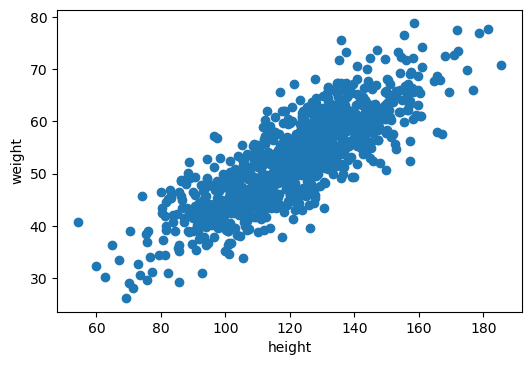

In [7]:
plt.figure(dpi = 100)
plt.scatter(height,weight)
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

## We will see how to gradient decent work in sklearn

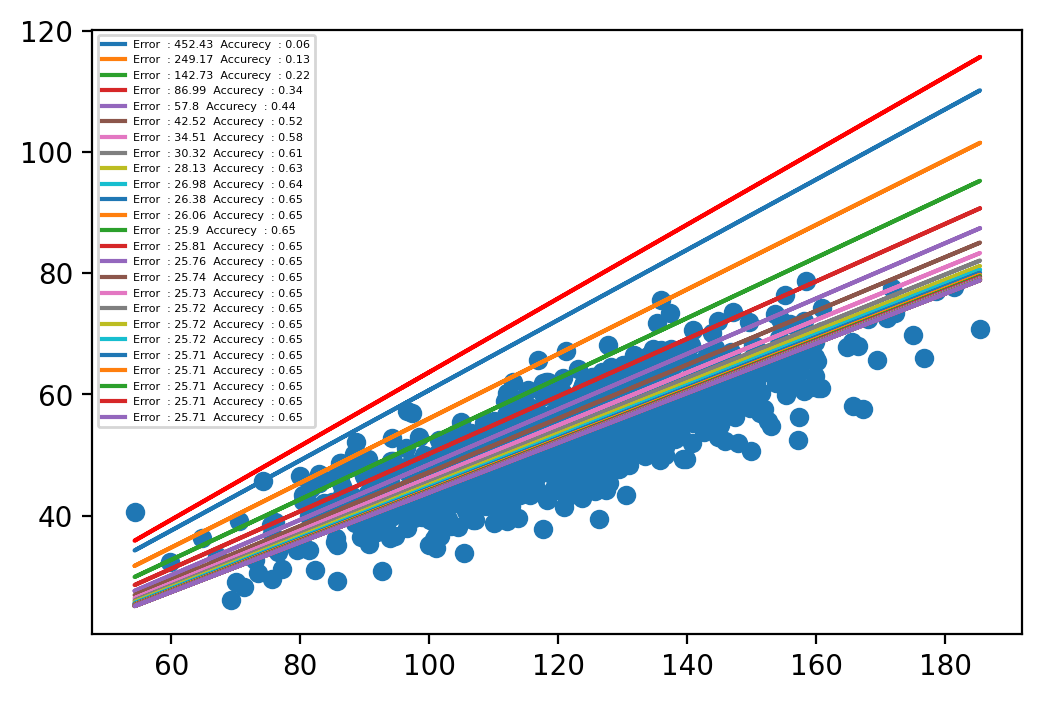

In [49]:
class GradientDescent:
    
    def predict(self,x,m,c):
        y_hat = m * x + c
        return y_hat
    
    def mse(self,y,y_hat):
        error = ((y-y_hat)**2).sum()/len(y)
        return round(error,2)

    def r2_score(self,y,y_hat):
        rss = ((y - y_hat) ** 2).sum()
        tss = ((y - y_hat.mean())**2).sum()
        accurecy = 1-(rss/tss)
        return round(accurecy,2)
    
    def optimize_value_of_0(self,height,weight):
        plt.figure(dpi = 200)
        eta = 0.00001
        n_iter = 50
        
        t0_next = np.random.random()*3
        t1_next = np.random.random()
        
        y_hat = self.predict(height,t1_next,t0_next)
        
        plt.scatter(height,weight)
        plt.plot(height,y_hat,"r-")
        
        for i in range(n_iter):
            grad_t0 = ( (y_hat - weight) ).sum() / len(weight)
            grad_t1 = ( (y_hat - weight)*height).sum() / len(weight)
            
            t0_next = t0_next - eta*grad_t0
            t1_next = t1_next - eta*grad_t1
            
            y_hat = self.predict(height,t1_next,t0_next)
            error = self.mse(weight,y_hat)
            Accurecy = self.r2_score(weight,y_hat)

            
            if i%2 == 0:
                error = round(self.mse(weight,y_hat),2)
                plt.plot(height,y_hat,label = f"Error  : {error}  Accurecy  : {Accurecy}")
        
        plt.legend(fontsize = 4)        
        plt.show()
        
        
        
my_model = GradientDescent()  
my_model.optimize_value_of_0(height,weight)

In [20]:
X = height.reshape(-1,1)

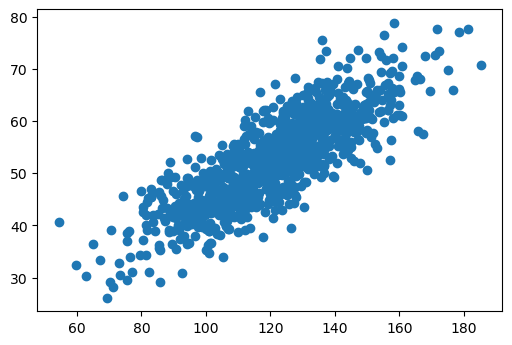

In [36]:
plt.figure(dpi = 100)
plt.scatter(X,weight)

## using gradient decent

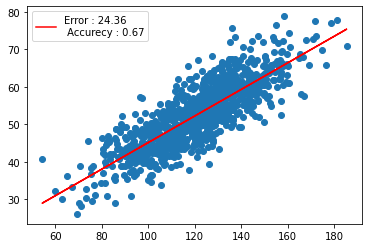

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = SGDRegressor(max_iter = 100,alpha=0.00001)
scale = StandardScaler()
Xs = scale.fit_transform(X)
model.fit(Xs,weight)
y_hat = model.predict(Xs)
error = round(mean_squared_error(weight,y_hat),2)
accurecy = round(r2_score(weight, y_hat),2)
plt.scatter(height,weight)
plt.plot(height,y_hat,'r-',label = f"Error : {error}\n Accurecy : {accurecy}")
plt.legend()
plt.show()